In [0]:
#Importing libraries
import pandas as pd
import numpy as np

#Library for PCA
from sklearn.decomposition import PCA
import sklearn.linear_model as sklm ##Includes Logistic Regression, which will be tested for predictive capability
import sklearn.decomposition as skdc ##Includes Principal Component Analysis, a method of dimensionality reduction
import sklearn.pipeline as skpl ##Convenient module for calculating PCs and using them in logistic regression

#Library for splitting the data set
from sklearn.model_selection import train_test_split

#Library for normalizing (sclaling) the dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Library for visualizing data 
import matplotlib as mpl
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
# seaborn is a layer on top of matplotlib which has additional visualizations
# just importing it changes the look of the standard matplotlib plots.
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.linear_model import LogisticRegression

#Library for KMeans
from sklearn.cluster import KMeans


In [2]:
# Preprocessing Input data
data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")

data.head()
X = data['row.names'].values.reshape(-1,1)
y = data['chd'].values.reshape(-1,1)
print(data.shape)
print(list(data.columns))

(462, 11)
['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'chd']


In [3]:
#Displaying the dataset
data.head(462)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
6,7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
7,8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
8,9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
9,10,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1


In [4]:
data.describe()

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,231.935065,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,133.938585,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,1.000000,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,116.250000,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,231.500000,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,347.750000,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,463.000000,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [5]:
#Number of class 0 and class 1
data['chd'].value_counts()


0    302
1    160
Name: chd, dtype: int64

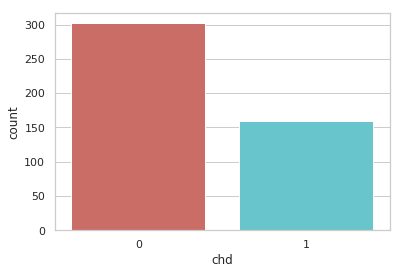

<Figure size 432x288 with 0 Axes>

In [6]:
#Plot of number of class 0 and class 1
sns.countplot(x='chd', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [7]:
#Percentage of class 0 and class 1
#Class 1 - people with coronary heart disease
#Class 0 - people without coronary heart disease
count_no_sub = len(data[data['chd']==0])
count_sub = len(data[data['chd']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Percentage of people without coronary heart disease", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("Percentage of people with coronary heart disease", pct_of_sub*100)

Percentage of people without coronary heart disease 65.36796536796537
Percentage of people with coronary heart disease 34.63203463203463


In [8]:
# To find the number of missing datas
data.isnull().values.any() 
  
pd.isnull(data)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().values.any() #no data is missing
  

False

In [10]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
row.names    462 non-null int64
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null object
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB
None


In [11]:
cat_data = data.select_dtypes(include=['object']).copy()
cat_data.head(462)


,famhist
0,Present
1,Absent
2,Present
3,Present
4,Present
5,Present
6,Absent
7,Present
8,Present
9,Present


In [12]:
print(cat_data.isnull().values.sum())
print(cat_data.isnull().sum())
# no null values

0
famhist    0
dtype: int64


In [13]:
#ONE-HOT CODING
cat_data_onehot = cat_data.copy()
cat_data_onehot = pd.get_dummies(cat_data_onehot,columns=['famhist'],prefix = ['famhist'])

print(cat_data_onehot.head(462))
data.drop("famhist",axis=1)

pd.concat([data,cat_data_onehot],axis=1)


     famhist_Absent  famhist_Present
0                 0                1
1                 1                0
2                 0                1
3                 0                1
4                 0                1
5                 0                1
6                 1                0
7                 0                1
8                 0                1
9                 0                1
10                1                0
11                0                1
12                1                0
13                1                0
14                0                1
15                0                1
16                1                0
17                0                1
18                0                1
19                0                1
20                1                0
21                0                1
22                0                1
23                1                0
24                1                0
25                0                1
2

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,famhist_Absent,famhist_Present
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,0,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,1,0
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,0,1
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,0,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,0,1
5,6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0,0,1
6,7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0,1,0
7,8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1,0,1
8,9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0,0,1
9,10,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1,0,1


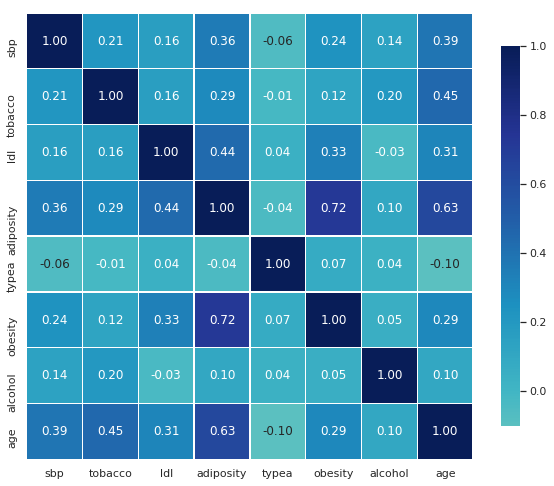

In [14]:
#Data Correlation: Is a way to understand the relationship between multiple variables and attributes in your dataset.
def correlation_heatmap(data):
    correlations = data.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
datac=data.drop("row.names",axis=1)
datac=datac.drop("chd",axis=1)

correlation_heatmap(datac)


In [15]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

print(data["famhist"].value_counts())
df=data["famhist"]
#data
values=array(df)
#values
#integer encode 
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
#print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

#print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)
data['famhist']=onehot_encoded
data

Absent     270
Present    192
Name: famhist, dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,0.0,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,1.0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,0.0,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,0.0,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,0.0,60,25.99,57.34,49,1
5,6,132,6.20,6.47,36.21,0.0,62,30.77,14.14,45,0
6,7,142,4.05,3.38,16.20,1.0,59,20.81,2.62,38,0
7,8,114,4.08,4.59,14.60,0.0,62,23.11,6.72,58,1
8,9,114,0.00,3.83,19.40,0.0,49,24.86,2.49,29,0
9,10,132,0.00,5.80,30.96,0.0,69,30.11,0.00,53,1


In [16]:
from sklearn.preprocessing import StandardScaler
import pandas
import numpy

ss=StandardScaler()

Xstd=ss.fit_transform(data[['row.names','sbp','tobacco','ldl','adiposity','famhist','typea','obesity','alcohol','age','chd']].values)

Xstd[:,[0]]=data[['row.names']]
Xstd[:,[5]]=data[['famhist']]    
Xstd[:,[10]]=data[['chd']]  
print(Xstd)


[[ 1.00000000e+00  1.05856354e+00  1.82307289e+00 ...  3.27773797e+00
   6.29335727e-01  1.00000000e+00]
 [ 2.00000000e+00  2.77089288e-01 -7.90237441e-01 ... -6.12744628e-01
   1.38311470e+00  1.00000000e+00]
 [ 3.00000000e+00 -9.92806375e-01 -7.74980417e-01 ... -5.41183302e-01
   2.18183562e-01  0.00000000e+00]
 ...
 [ 4.61000000e+02 -1.48122778e+00 -1.38544539e-01 ...  3.92385310e-01
   8.34911809e-01  0.00000000e+00]
 [ 4.62000000e+02 -9.92806375e-01  3.84553443e-01 ...  2.83203173e-01
  -1.92968603e-01  0.00000000e+00]
 [ 4.63000000e+02 -3.09016402e-01 -7.92417016e-01 ... -6.96982531e-01
   2.18183562e-01  1.00000000e+00]]


In [17]:
f1=Xstd[:,[1]].ravel()
f2=Xstd[:,[2]].ravel()
f3=Xstd[:,[3]].ravel()
f4=Xstd[:,[4]].ravel()
f5=Xstd[:,[5]].ravel()
f6=Xstd[:,[6]].ravel()
f7=Xstd[:,[7]].ravel()
f8=Xstd[:,[8]].ravel()
f9=Xstd[:,[9]].ravel()
#print(f1)
f=[f1,f2,f3,f4,f5,f6,f7,f8,f9]
print(f)
y=Xstd[:,[10]].ravel()
#print (y)

[array([ 1.05856354,  0.27708929, -0.99280637,  1.54698495, -0.21133212,
       -0.3090164 ,  0.17940501, -1.18817494, -1.18817494, -0.3090164 ,
        3.30530202, -0.21133212, -0.99280637, -0.3090164 , -1.28585922,
       -1.04164852, -0.89512209,  0.37477357,  0.96087926, -0.69975353,
       -1.57891207, -0.3090164 ,  0.57014213, -0.01596356,  0.17940501,
       -0.69975353, -0.99280637,  0.32593143,  0.27708929,  0.37477357,
       -0.11364784,  0.96087926, -0.79743781, -0.60206925,  0.47245785,
       -0.79743781,  0.08172072, -1.3835435 , -0.40670068, -0.11364784,
       -0.99280637,  0.27708929, -0.89512209, -0.40670068, -1.18817494,
       -0.50438497,  1.15624782, -1.09049066, -1.18817494, -0.60206925,
       -0.79743781, -0.21133212,  0.66782642, -0.21133212,  0.86319498,
        0.66782642, -0.99280637, -0.60206925, -1.72543849, -0.84627995,
        0.17940501, -0.01596356,  0.66782642,  0.08172072, -0.40670068,
       -0.11364784, -0.69975353, -1.28585922, -0.99280637, -0.7

In [18]:
#Random values of theta
import random
theta=[]
for i in range(9):
  theta.append(random.random())
print(theta)

[0.961757557109433, 0.48700111871191265, 0.36498620305170026, 0.3871601139934838, 0.5106964677622933, 0.09277693790113017, 0.6436110992930812, 0.2054518414154185, 0.25341051696619077]


In [0]:
  #function to create a list containing mini-batches 

#y = data.chd.values
#df = data.drop(['chd'], axis = 1)
df=data
# Normalization
df = (df - np.min(df)) / (np.max(df) - np.min(df)).values
def create_mini_batches(data, y, batch_size): 
    mini_batches = []  
    n_minibatches = 9 
    i = 0 
    for i in range(n_minibatches + 1): 
        mini_batch = df.iloc[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch.iloc[:, :-1]

        Y_mini = mini_batch.iloc[:, -1]
        #Y_mini.reshape((-1, 1)) 
        #print(Y_mini)
        mini_batches.append((X_mini, Y_mini)) 
    if df.shape[0] % batch_size != 0: 
        mini_batch = df[i * batch_size:df.shape[0]] 
        X_mini = mini_batch.iloc[:, :-1]
        Y_mini = mini_batch.iloc[:, -1]
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
#create_mini_batches(data, y, batch_size=50)

iteration: 500
cost: 0.6716394716170685


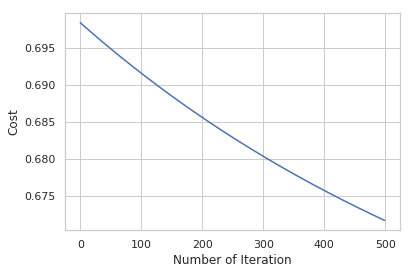

Manuel Test Accuracy: 66.38%


In [20]:
###  GD LogisticRegression implementation (without minibach)

Y = data.chd.values
x_data = data.drop(['chd'], axis = 1)

# Normalization
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,Y,test_size = 0.25,random_state=0)

#transpose x and y
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

#initialization
def initialize(dimension):
  weight = np.full((dimension,1),0.01)
  bias = 0.0
  return weight,bias

# sigmoid function
def sigmoid(z):   
  y_head = 1/(1+ np.exp(-z))
  return y_head

def forwardBackward(weight,bias,x_train,y_train):
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    return cost,gradients
  
def update(weight,bias,x_train,y_train,learningRate,iteration):
    costList = []
    index = []
    #update weight and bias values
    for i in range(iteration):
      cost,gradients = forwardBackward(weight,bias,x_train,y_train)
      weight = weight - learningRate * gradients["Derivative Weight"]
      bias = bias - learningRate * gradients["Derivative Bias"]
      costList.append(cost)
      index.append(i)
    parameters = {"weight": weight,"bias": bias}    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients

def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)
    y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)
    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)/100*100))
logistic_regression(x_train,y_train,x_test,y_test,0.001,500)

In [0]:
#logistic_regression(x_train,y_train,x_test,y_test,0.001,500)
#logistic_regression(x_train,y_train,x_test,y_test,0.001,1000)
#logistic_regression(x_train,y_train,x_test,y_test,0.001,10000)
#logistic_regression(x_train,y_train,x_test,y_test,0.0001,500)
#logistic_regression(x_train,y_train,x_test,y_test,0.0001,1000)
#logistic_regression(x_train,y_train,x_test,y_test,0.0001,10000)

In [22]:
# LR using library 
import sklearn
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()

logisticRegr.fit(X, y)

predictions =logisticRegr.predict(X)

score = logisticRegr.score(X,y)
print(score)

0.6536796536796536


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
# PCA
import matplotlib.pyplot as plt
%matplotlib inline

#regr = LinearRegression()
Y = data.chd.values
x_data = data.drop(['chd'], axis = 1)
x_data = x_data.drop(['row.names'], axis = 1)

# split data for train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_data,Y,test_size = 0.25,random_state=0)

# normalization
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test) 
x_data=ss.transform(x_data)

# PCA
pca=PCA(n_components=9) 
x_trian = pca.fit_transform(x_train) 
x_test=pca.transform(x_test)

#print(pca.components)
principal_Df = pd.DataFrame(data = x_train , columns = ['PC1', 'PC2' ,'PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
principal_Df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1.033341,0.056026,-0.281444,0.404305,-1.177373,-1.183142,-0.228607,-0.685993,1.156528
1,-1.171815,0.072828,-0.083704,-1.350671,-1.177373,0.870367,-0.697753,-0.395075,1.022963
2,-0.269706,1.799217,0.577035,0.927917,-1.177373,0.356990,0.946604,0.244771,1.290092
3,-0.470174,-0.238006,0.085098,-0.503873,0.849349,0.767692,-1.122331,-0.685993,-0.780154
4,0.632403,-0.721059,0.779598,1.078236,-1.177373,0.870367,-0.338856,-0.685993,0.488706


In [24]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.31968615 0.13958378 0.12165002 0.10010675 0.09620355 0.08454878
 0.07002683 0.05044186 0.01775228]


In [0]:
# PCA with 90%
pca2=PCA(n_components=7) 
x_train2 = pca2.fit_transform(x_train) 
x_test2=pca2.transform(x_test)


In [26]:
print('Explained variation per principal component: {}'.format(pca2.explained_variance_ratio_))


Explained variation per principal component: [0.31968615 0.13958378 0.12165002 0.10010675 0.09620355 0.08454878
 0.07002683]


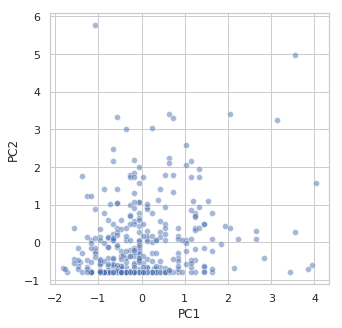

In [27]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.scatterplot(
    x="PC1", y="PC2",
    palette=sns.color_palette("hls", 20),
    data=principal_Df,
    legend="full",
    alpha=0.5)


iteration: 500
cost: 0.6400577060301302


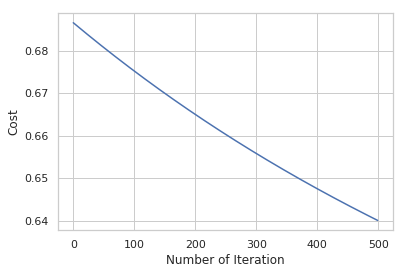

Accuracy on the test set: 60.34%


In [28]:
# Logistica regression withh all PCs
#transpose x and y
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

#initialization
def initialize(dimension):
  weight = np.full((dimension,1),0.01)
  bias = 0.0
  return weight,bias

# sigmoid function
def sigmoid(z):   
  y_head = 1/(1+ np.exp(-z))
  return y_head

def forwardBackward(weight,bias,x_train,y_train):
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    return cost,gradients
    
def update(weight,bias,x_train,y_train,learningRate,iteration):
    costList = []
    index = []
    #update weight and bias values
    for i in range(iteration):
      cost,gradients = forwardBackward(weight,bias,x_train,y_train)
      weight = weight - learningRate * gradients["Derivative Weight"]
      bias = bias - learningRate * gradients["Derivative Bias"]
      costList.append(cost)
      index.append(i)
    parameters = {"weight": weight,"bias": bias}    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients

def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)
    y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)
    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    print("Accuracy on the test set: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)/100*100))
logistic_regression(x_train,y_train,x_test,y_test,0.001,500)

iteration: 500
cost: 0.6407849286161765


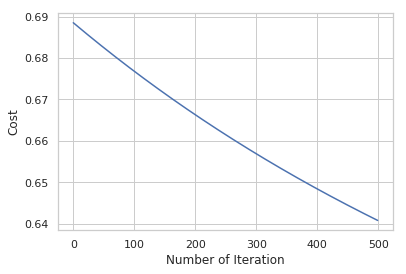

Accuracy on the test set: 62.07%


In [29]:
# Logistic regression with 90% PCA
#transpose x and y
x_train = x_train2.T
y_train = y_train.T
x_test = x_test2.T
y_test = y_test.T

#initialization
def initialize(dimension):
  weight = np.full((dimension,1),0.01)
  bias = 0.0
  return weight,bias

# sigmoid function
def sigmoid(z):   
  y_head = 1/(1+ np.exp(-z))
  return y_head

def forwardBackward(weight,bias,x_train,y_train):
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    return cost,gradients
    
def update(weight,bias,x_train,y_train,learningRate,iteration):
    costList = []
    index = []
    #update weight and bias values
    for i in range(iteration):
      cost,gradients = forwardBackward(weight,bias,x_train,y_train)
      weight = weight - learningRate * gradients["Derivative Weight"]
      bias = bias - learningRate * gradients["Derivative Bias"]
      costList.append(cost)
      index.append(i)
    parameters = {"weight": weight,"bias": bias}    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients

def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)
    y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)
    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    print("Accuracy on the test set: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)/100*100))
logistic_regression(x_train,y_train,x_test,y_test,0.001,500)

In [30]:
# PCA
pca=PCA(n_components=9) 
x_data = pca.fit_transform(x_data) 
#print(pca.components_)

principal_Df = pd.DataFrame(data = x_data , columns = ['PC1', 'PC2' ,'PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
principal_Df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1.844267,3.517338,-0.710947,-0.619883,-0.433301,-0.458824,0.987023,0.640580,0.399038
1,0.637111,-0.822172,0.468869,0.819396,0.140371,0.421281,-0.477442,-1.235532,0.588829
2,0.204947,-0.995624,-0.305933,-0.898690,-1.045054,-0.149003,-1.323836,-0.400515,-0.247066
3,3.161100,0.017257,0.051477,-0.283434,-0.338191,0.622855,-0.122508,0.490332,-0.120062
4,1.133092,2.140202,-1.256472,-0.756279,0.556687,-0.727157,-0.876979,0.566776,-0.216512


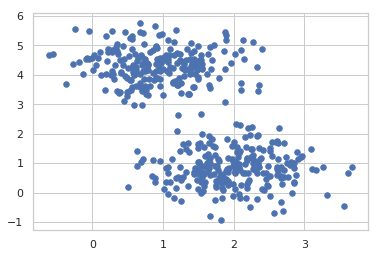

In [31]:
from sklearn.datasets.samples_generator import make_blobs
x_data, y_id_array = make_blobs(n_samples=462, centers=2,
                       cluster_std=0.60, random_state=0)
plt.scatter(x_data[:, 0], x_data[:, 1], s=30);

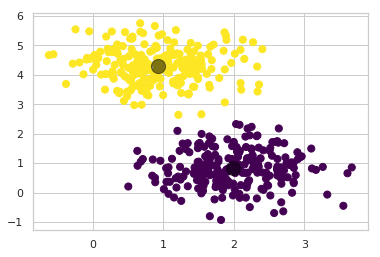

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_data)
y_kmeans = kmeans.predict(x_data)
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


In [33]:
from sklearn.metrics import accuracy_score #works
score = accuracy_score(Y,y_kmeans)
print('Accuracy of the model is: {0:f}'.format(score))

Accuracy of the model is: 0.512987


In [34]:
# Y 1=  y_kmeans 1
 
correct = 0
for i in range(len(Y)):
    #print(prediction)
    if Y[i] == 1:
      if y_kmeans[i]==1:
        correct += 1

print('Accuracy cluster 1 is:{0:f}'.format(correct/len(x_data)))

#  Y 0=  y_kmeans 0
 
correct = 0
for i in range(len(Y)):
    
    #print(prediction)
    if Y[i] == 0:
      if y_kmeans[i]==0:
        correct += 1

print('Accuracy cluster 0 is:{0:f}'.format(correct/len(x_data)))


Accuracy cluster 1 is:0.179654
Accuracy cluster 0 is:0.333333


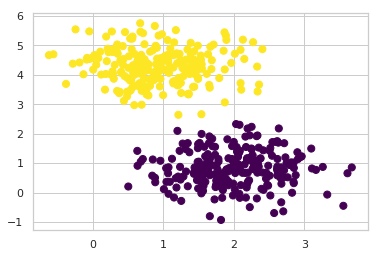

In [35]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(x_data, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(x_data.shape[0])[:n_clusters]
    centers = x_data[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(x_data, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([x_data[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(x_data, 2)
plt.scatter(x_data[:, 0], x_data[:, 1], c=labels,
            s=50, cmap='viridis');

In [36]:
from sklearn.decomposition import PCA
seed = 0

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(x_data)
X_pca_array = pca.transform(x_data)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.head(5)

,PC1,PC2
0,-0.938135,-0.442625
1,2.513983,-0.192776
2,1.384800,-0.210536
3,-0.065812,0.103572
4,1.528553,-0.305980


In [37]:
y_id_array=data['chd']
df_plot = X_pca.copy()
df_plot['Cluster-Kmeans'] = y_kmeans
df_plot['Class-CHD'] = y_id_array # also add actual labels so we can use it in later plots
df_plot.head(10)

,PC1,PC2,Cluster-Kmeans,Class-CHD
0,-0.938135,-0.442625,1,1
1,2.513983,-0.192776,0,1
2,1.384800,-0.210536,0,0
3,-0.065812,0.103572,1,1
4,1.528553,-0.305980,0,1
5,0.435332,0.515007,0,0
6,-3.222394,-0.591343,1,0
7,1.880304,-0.759377,0,1
8,-2.120494,0.202972,1,0
9,-1.397425,0.413446,1,1


In [0]:
def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))
    nclusters=2
    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA)");

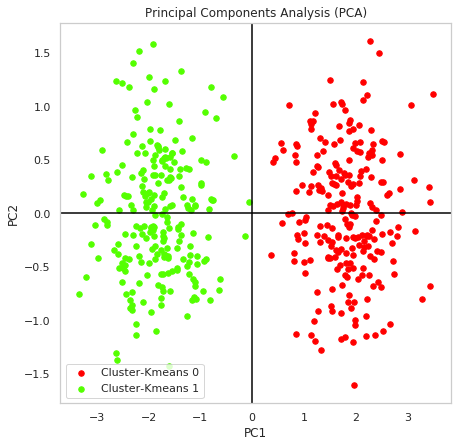

In [39]:
plotData(df_plot, 'Cluster-Kmeans')

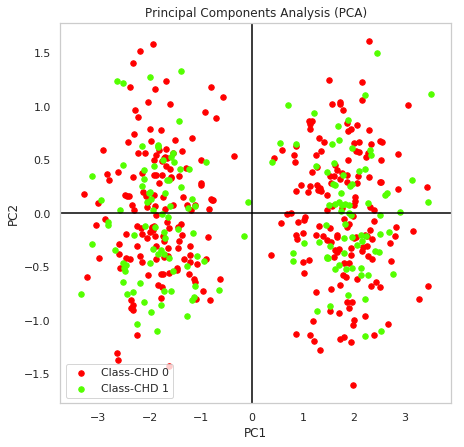

In [40]:
plotData(df_plot, 'Class-CHD')